# Practical 1 : integrating single-cell and spatial analysis in python
In this practical, you will jointly analyse single-cell (10X genomics chromium) and spatial transcriptomics (10X genomics visium) from a lung cancer tumor.

Reference: Zuani et al. Nat Commun 2024 https://www.nature.com/articles/s41467-024-48700-8  

We will focus on a single donor, patient 10 (P10), a female in the [70-79] age group without smoking history with an adenocarcinoma on which 1 single-cell and 4 spatial sequencing were performed.

The analysis will be performed using modules scanpy and squidpy. See the scanpy (https://scanpy.readthedocs.io/en/stable/tutorials/index.html) and squidpy (https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_visium_hne.html) documentation and tutorials as well as the excellent single-cell best practices workflow (https://www.sc-best-practices.org/cellular_structure/clustering.html) for help on the relevant functions.

## Part I: single-cell analyses

The data was already processed (see scripts in files/data/Practical1/scRNAseq/scripts/), with QC and filtering of cells and features as well as ambiant RNA correction doublet flagging.

In the fist part of this practical, you will vizualise, clusterise and annotate the dataset.

### loading modules

We will mostly use module scanpy, attributing it the alias sc. scanpy has submodules for preprocessing (submodule pp, accessed using sc.pp), for its main tools functions (submodule tl, accessed with sc.tl), and for plotting (submodule pl, accessed with sc.pl). See the scanpy doc for a full list of functions from each submodule https://scanpy.readthedocs.io/

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data
The processed data is in the /data/Training-MG/files/data/Practical1/scRNAseq/processed folder.

Q1: load the data using the anndata module 

In [2]:
ddir = os.path.join("/data/", "Training-MG/files/data/Practical1/scRNAseq/2025/processed")

adata_sc_3B = sc.read(os.path.join(ddir, "sample3B_processed.h5ad") )

Q2: Print the anndata object. How many cells are there? How many features?

Q3: What are the different layers present? What do they correspond to?

Q4: Plot the distribution of gene expression for gene RB1 (see https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html for plotting options from submodule sc.pl), for the different layers (layer option). Which one would favor for downsteam analysis and why?

AnnData object with n_obs × n_vars = 8933 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'is_outlier', 'sample', 'scDblFinder_score', 'scDblFinder_class'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant', 'binomial_deviance', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'corrected_counts', 'counts', 'log1p_norm', 'soupX_counts'


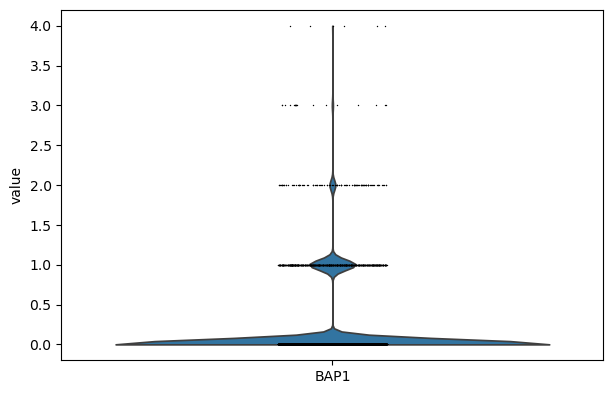

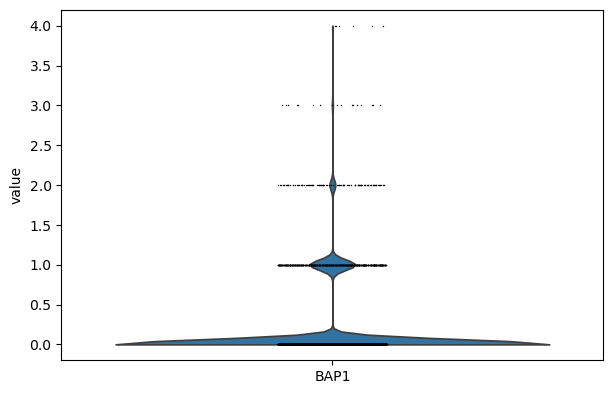

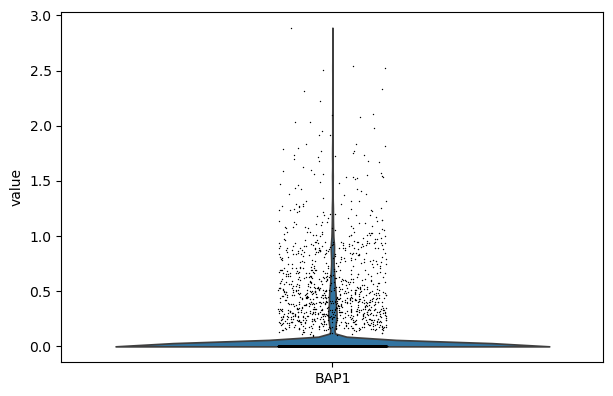

In [3]:
#Q2
print(adata_sc_3B) # 8933 cells & 36601 features

#Q3. counts: raw counts, log1p_norm, normalized counts using the shifted normalization algorithm, souX_counts: corrected counts for ambiant RNA

#Q4. log1p_norm would be favored because of smaller batch effects and better statistical properties (continuous, less skewed) 
adata_sc_3B.var_names
sc.pl.violin(adata_sc_3B,["BAP1"],layer="counts")
sc.pl.violin(adata_sc_3B,["BAP1"],layer="soupX_counts")
sc.pl.violin(adata_sc_3B,["BAP1"],layer="log1p_norm")

### Clustering and vizualisation

Q5: compute the K-nearest neighbour graph (function neighbors from the sc.pp submodule) and leiden clustering function (function leiden from the sc.tl submodule) .

Q6: compute (function umap from the scanpy pp submodule) and plot the results using UMAP (function umap from the pl submodule). 

In [4]:
print(adata_sc_3B)

AnnData object with n_obs × n_vars = 8933 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'is_outlier', 'sample', 'scDblFinder_score', 'scDblFinder_class'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant', 'binomial_deviance', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'corrected_counts', 'counts', 'log1p_norm', 'soupX_counts'


/home/laurane.mange/miniconda3/envs/MG_sc_env/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:577: UserWarning: You’re trying to run this on 36601 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  x = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)
/home/laurane.mange/.cache/tmp/ipykernel_615407/976234077.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_sc_3B)


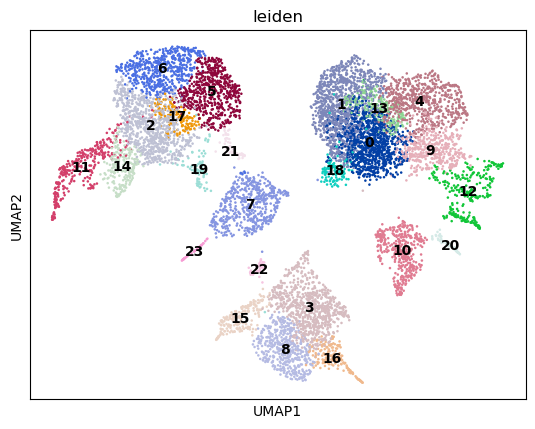

In [5]:
#Q5
sc.pp.neighbors(adata_sc_3B, n_pcs=30)
sc.tl.leiden(adata_sc_3B)



#Q6
sc.tl.umap(adata_sc_3B)
sc.pl.umap(
    adata_sc_3B,
    color=["leiden"],
    legend_loc="on data",
)

### Annotating cells

For the first part of the cell annotation, we will use the celltypist module. See https://www.celltypist.org/ for the documentation and tutorials

In [6]:
import celltypist
from celltypist import models

/home/laurane.mange/miniconda3/envs/MG_sc_env/lib/python3.10/site-packages/celltypist/classifier.py:11: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  from scanpy import __version__ as scv


Q9: Download the immune single-cell reference "Immune_All_High.pkl" using the download_models function. Print the object. What cell types are in the reference? 

Q10: Perform an annotation using the CellTypist trained classifier for immune cells (you can use the "coarser" model)

Q11: Check the quality of the annotation. Are there cell types with dubious annotations, and if so, why do you think they are hard to annotate?

Q12: plot the proportion of cell types. Does it match your expectations?

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 59
📂 Storing models in /home/laurane.mange/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Immune_All_High.pkl


['B cells' 'B-cell lineage' 'Cycling cells' 'DC' 'DC precursor'
 'Double-negative thymocytes' 'Double-positive thymocytes' 'ETP'
 'Early MK' 'Endothelial cells' 'Epithelial cells' 'Erythrocytes'
 'Erythroid' 'Fibroblasts' 'Granulocytes' 'HSC/MPP' 'ILC' 'ILC precursor'
 'MNP' 'Macrophages' 'Mast cells' 'Megakaryocyte precursor'
 'Megakaryocytes/platelets' 'Mono-mac' 'Monocyte precursor' 'Monocytes'
 'Myelocytes' 'Plasma cells' 'Promyelocytes' 'T cells' 'pDC'
 'pDC precursor']


🔬 Input data has 8933 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 6147 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


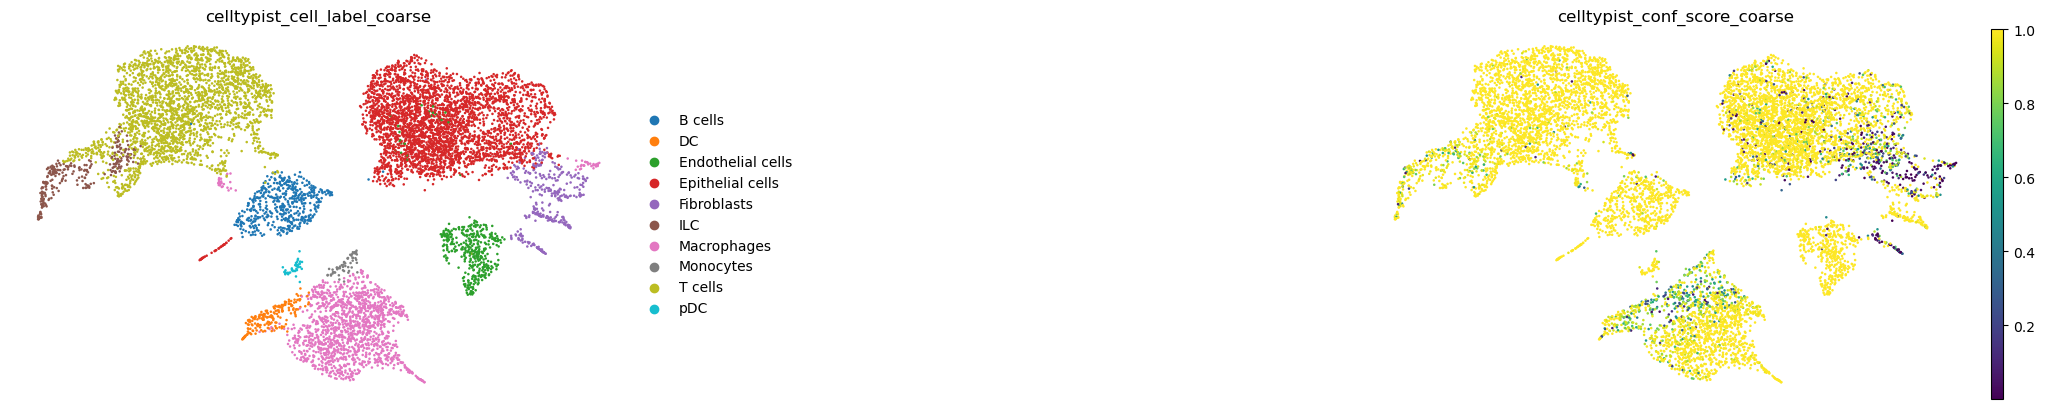

celltypist_cell_label_coarse
Epithelial cells     0.369753
T cells              0.270346
Macrophages          0.158289
B cells              0.055524
Endothelial cells    0.046569
Fibroblasts          0.038173
ILC                  0.029106
DC                   0.021381
Monocytes            0.006269
pDC                  0.004590
Name: count, dtype: float64


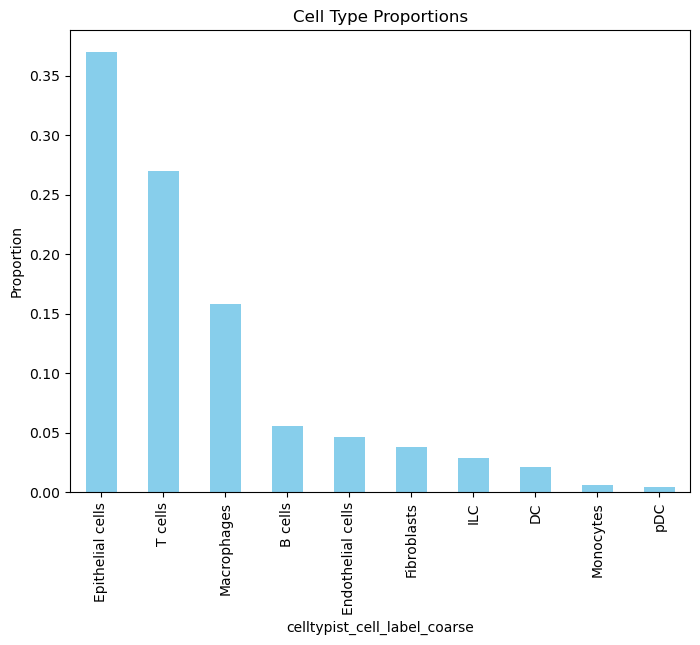

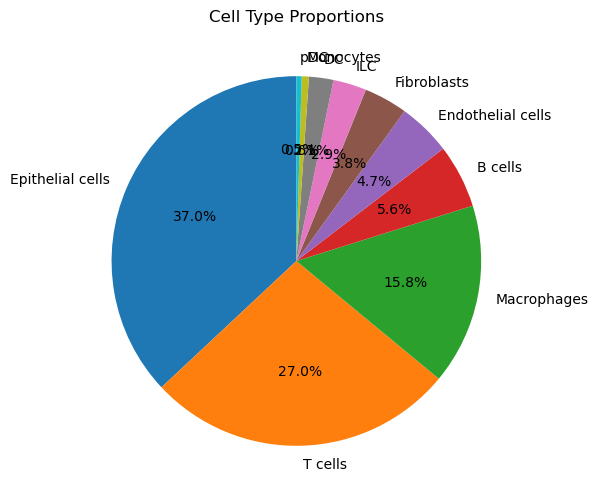

In [7]:
# Q9
## getting annot databases (2 exist but will only use "coarse" annotation)
models.download_models(
    force_update=True, model=["Immune_All_High.pkl"]
)

model_high = models.Model.load(model="Immune_All_High.pkl")

print(model_high.cell_types)## B cells, ...

#Q10 performing annotation    
adata_celltypist = adata_sc_3B.copy()  # make a copy of our adata
adata_celltypist.X = adata_sc_3B.layers["counts"]  # set adata.X to raw counts

sc.pp.normalize_per_cell(
    adata_celltypist, counts_per_cell_after=10**4
)  # normalize to 10,000 counts per cell

sc.pp.log1p(adata_celltypist)  # log-transform

# make .X dense instead of sparse, for compatibility with celltypist:
adata_celltypist.X = adata_celltypist.X.toarray()

predictions_high = celltypist.annotate(
adata_celltypist, model=model_high, majority_voting=True
)

predictions_high_adata = predictions_high.to_adata()

adata_sc_3B.obs["celltypist_cell_label_coarse"] = predictions_high_adata.obs.loc[
    adata_sc_3B.obs.index, "majority_voting"
]
adata_sc_3B.obs["celltypist_conf_score_coarse"] = predictions_high_adata.obs.loc[
    adata_sc_3B.obs.index, "conf_score"
]

#Q11
sc.pl.umap(
    adata_sc_3B,
    color=["celltypist_cell_label_coarse", "celltypist_conf_score_coarse"],
    frameon=False,
    sort_order=False,
    wspace=1,
    )

#Q12
cell_type_counts = adata_sc_3B.obs['celltypist_cell_label_coarse'].value_counts()

cell_type_proportions = cell_type_counts / cell_type_counts.sum()

print(cell_type_proportions)

# Bar plot
cell_type_proportions.plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.ylabel('Proportion')
plt.title('Cell Type Proportions')
plt.show()

# Pie chart
cell_type_proportions.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Cell Type Proportions')
plt.show()

In [8]:
set(adata_sc_3B.obs["celltypist_cell_label_coarse"])

{'B cells',
 'DC',
 'Endothelial cells',
 'Epithelial cells',
 'Fibroblasts',
 'ILC',
 'Macrophages',
 'Monocytes',
 'T cells',
 'pDC'}

### Identifying tumor cells

Q7: Perform copy number calling using module infercnvpy. 

Q8: Visualise the CNV profile of the tumor. Do you find some of the known alterations driving adenocarcinoma (see e.g. https://www.nature.com/articles/s41467-023-43732-y/figures/1 panel d for genes frequently amplified or deleted, and https://www.genecards.org/ to find their locations) ?

In [9]:
adata_sc_3B.var

,gene_ids,feature_types,genome,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_deviant,binomial_deviance,highly_variable,means,dispersions,dispersions_norm
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,0.000000,False,1.000000e-12,NaN,NaN
FAM138A,ENSG00000237613,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,0.000000,False,1.000000e-12,NaN,NaN
OR4F5,ENSG00000186092,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,0.000000,False,1.000000e-12,NaN,NaN
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,False,False,18,0.001823,0.001821,99.817685,18.0,2.944439,False,172.144871,False,1.476793e-03,0.141053,-0.676030
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,False,False,False,1,0.000101,0.000101,99.989871,1.0,0.693147,False,161.597721,False,9.936844e-04,2.183914,1.920797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38,False,False,False,5,0.001317,0.001316,99.949357,13.0,2.639057,False,26.749724,False,1.645623e-04,0.385368,-0.365462
AC023491.2,ENSG00000278633,Gene Expression,GRCh38,False,False,False,0,0.000000,0.000000,100.000000,0.0,0.000000,False,0.000000,False,1.000000e-12,NaN,NaN
AC007325.1,ENSG00000276017,Gene Expression,GRCh38,False,False,False,1,0.000101,0.000101,99.989871,1.0,0.693147,False,21.385911,False,1.315669e-04,0.161578,-0.649938
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,False,False,False,150,0.016003,0.015877,98.480705,158.0,5.068904,False,1496.496584,False,1.813521e-02,0.894990,0.282354


In [17]:
import infercnvpy as cnv

cnv.io.genomic_position_from_biomart(adata_sc_3B, adata_gene_id="gene_ids")

In [18]:
cnv.tl.infercnv(
    adata_sc_3B,
    reference_key="celltypist_cell_label_coarse",
    reference_cat=['B cells', 'DC',
 'Endothelial cells', 'Fibroblasts','Macrophages', 'ILC', 'Monocytes',
 'T cells', 'pDC'],
 window_size= 250
)

  0%|          | 0/2 [00:00<?, ?it/s]

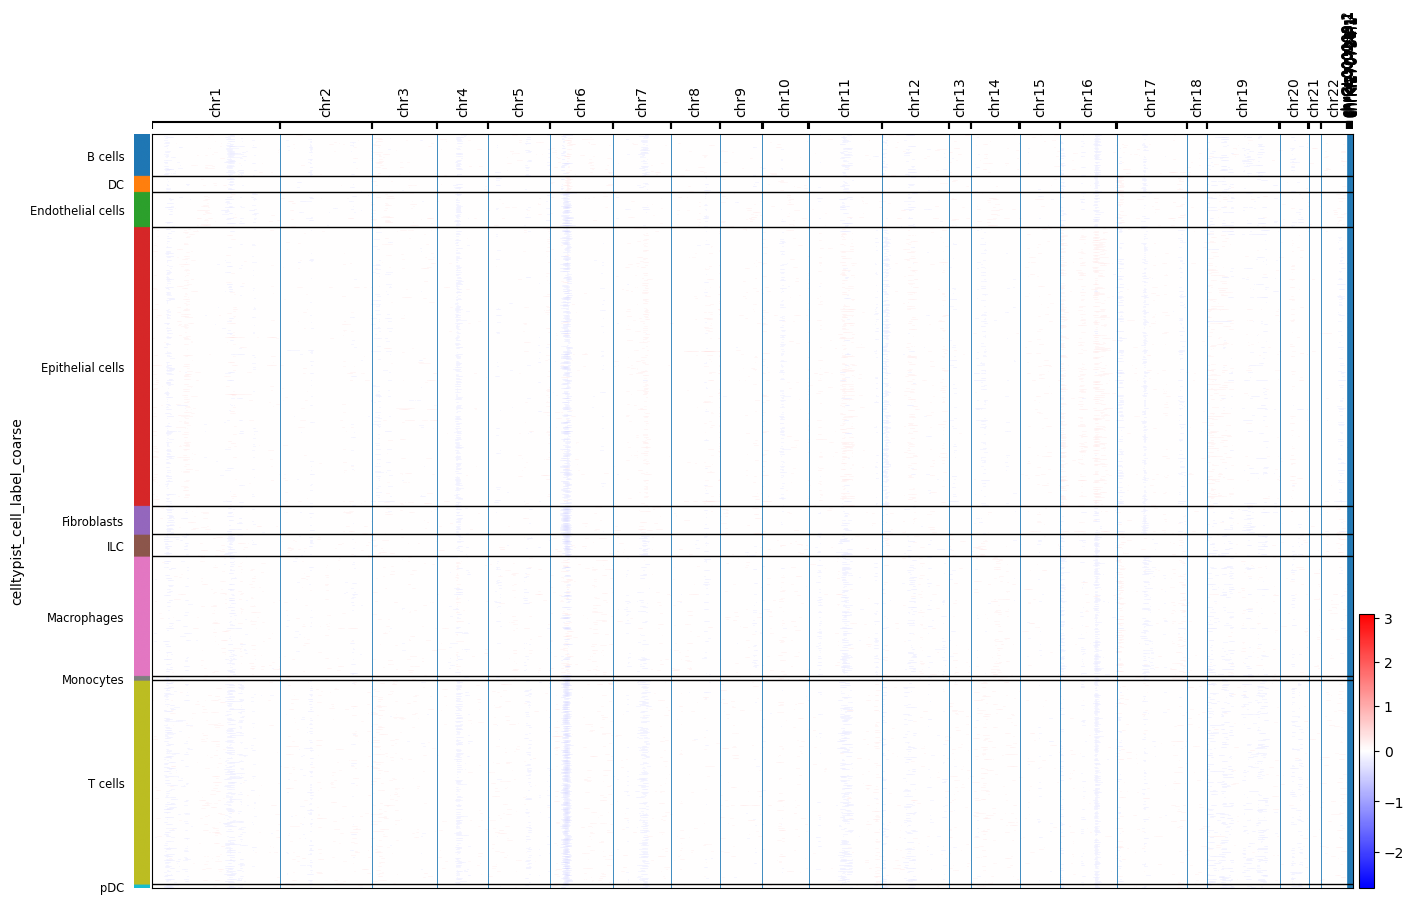

In [19]:
cnv.pl.chromosome_heatmap(adata_sc_3B,groupby="celltypist_cell_label_coarse")